In [1]:
import torch
# from torch.autograd import Variable # Deprecated -> Torch에 지원
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset # DataLoader, TensorDataset

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

import pandas as pd

# 1. Wine 데이터 

### 데이터 준비

In [2]:
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [4]:
df.shape, wine.target_names, wine.target

((178, 13),
 array(['class_0', 'class_1', 'class_2'], dtype='<U7'),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2]))

In [15]:
 wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [16]:
wine_data = wine.data[:130]
wine_target = wine.target[:130]
wine_data, wine_target

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.179e+01, 2.130e+00, 2.780e+00, ..., 9.700e-01, 2.440e+00,
         4.660e+02],
        [1.237e+01, 1.630e+00, 2.300e+00, ..., 8.900e-01, 2.780e+00,
         3.420e+02],
        [1.204e+01, 4.300e+00, 2.380e+00, ..., 7.900e-01, 2.570e+00,
         5.800e+02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [57]:
# train_X, test_X, train_y, test_y = train_test_split(wine_data, wine_target, test_size=.2)
train_X, test_X, train_y, test_y = train_test_split(wine_data, wine_target, test_size=.2)

KeyError: 1

In [39]:
print(train_X.shape)
print(test_X.shape)

(104, 13)
(26, 13)


### 텐서 생성

In [40]:
# This is the Code
# tensor from numpy
train_X = torch.from_numpy(train_X).float() # double(float64)->float(float32)
train_y = torch.from_numpy(train_y).long() # long -> long (int64)

In [41]:
test_X = torch.from_numpy(test_X).float()
test_y = torch.from_numpy(test_y).long() 

In [42]:
print(train_X.size()) # ->104행 13열 (2차원배열)
print(train_y.size()) # ->104행 1열  (1차원배열)

torch.Size([104, 13])
torch.Size([104])


In [43]:
len(wine_data)

130

In [44]:
# This is the Code
train = TensorDataset(train_X, train_y) # like Dataframe

In [45]:
train

In [46]:
train.tensors

(tensor([[1.1460e+01, 3.7400e+00, 1.8200e+00,  ..., 7.5000e-01, 2.8100e+00,
          5.6200e+02],
         [1.3160e+01, 2.3600e+00, 2.6700e+00,  ..., 1.0300e+00, 3.1700e+00,
          1.1850e+03],
         [1.3580e+01, 1.6600e+00, 2.3600e+00,  ..., 1.0900e+00, 2.8800e+00,
          1.5150e+03],
         ...,
         [1.4370e+01, 1.9500e+00, 2.5000e+00,  ..., 8.6000e-01, 3.4500e+00,
          1.4800e+03],
         [1.2690e+01, 1.5300e+00, 2.2600e+00,  ..., 9.6000e-01, 2.0600e+00,
          4.9500e+02],
         [1.2330e+01, 9.9000e-01, 1.9500e+00,  ..., 1.0600e+00, 2.3100e+00,
          7.5000e+02]]),
 tensor([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
         0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
         0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
         1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
         0, 1, 0, 1, 0, 0, 1, 1]))

In [47]:
print("train_X", train.tensors[0].size())
print("train_y", train.tensors[1].size())

train_X torch.Size([104, 13])
train_y torch.Size([104])


In [48]:
# This is the Code
train_loader = DataLoader(train, batch_size=16, shuffle=True) 
train_loader

### 신경망 구성 - P.79

In [49]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(13, 96)
        self.fc2 = nn.Linear(96, 96)
        self.fc3 = nn.Linear(96, 96)
        self.fc4 = nn.Linear(96, 96)
        self.fc5 = nn.Linear(96, 96)
        self.fc6 = nn.Linear(96, 2)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return F.log_softmax(x, dim=0)
    


In [50]:
# model Instance 생성
model = Net()

### 모형 학습 - P.81

In [51]:
# Cross Entropy Loss(Cost) Function
criterion = nn.CrossEntropyLoss()
# metric = nn.CrossEntropyLoss()

In [52]:
# Stochastic Gradient Decent
optimizer = optim.SGD(model.parameters(), lr=0.01) # learning late

In [53]:
for epoch in range(300):
    total_loss = 0
    
    for train_x, train_y in train_loader:
        # train_x, train_y = Variable(train_x), Variable(train_y) # Deprecated
        # train_x.requires_grad_()
        
        # RuntimeError: only Tensors of floating point dtype can require gradients
        # train_y = train_y.float()
        # train_y.requires_grad_()
        # train_y = Variable(train_y)
        
        optimizer.zero_grad() # reset gradient
        
        output = model(train_x)
        
        loss = criterion(output, train_y)

        loss.backward()
        
        optimizer.step()
        
        # total_loss += loss.data[0]
        total_loss += loss.item()
    if (epoch+1) % 50 == 0:
        print(epoch+1, total_loss)
        print("="*40)

50 2.2314298897981644
100 1.1322323381900787
150 0.7700340449810028
200 1.3254820480942726
250 1.1265596523880959
300 0.9863199256360531


In [54]:
type(test_X)

torch.Tensor

In [56]:
# 출력이 0 혹은 1이 되게 함
result = torch.max(model(test_X), 1)[1]
# result = torch.max(model(test_X), 1).indices

#정확도 측정
accuracy = sum(test_y.data.numpy() == result.numpy()) / len(test_y.data.numpy())
accuracy

0.8846153846153846

# 2. MNIST 데이터

In [58]:
import torch

# from torch.autograd import Variable  # Deprecated
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.datasets import load_digits
from sklearn import datasets, model_selection

import pandas as pd

# matplotlib 라이브러리 임포트
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

In [72]:
# mldata.org is no longer operational.
# mnist = datasets.fetch_mldata('MNIST original', data_home='./data/') # deprecated

/Users/Mac/Tweakers/tweakers-Lecture/실습자료/machine-learning/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/Users/Mac/Tweakers/tweakers-Lecture/실습자료/machine-learning/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


KeyboardInterrupt: 

In [59]:
# https://www.openml.org
# https://www.openml.org/d/554
mnist = datasets.fetch_openml(name='mnist_784', data_home='./data/') # 사용하세요.

In [60]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [106]:
mnist.data.min(), mnist.data.max()

(0.0, 255.0)

In [63]:
# 값의 범위가 0~256 
# 정규화 0~1사이로 만듬
mnist_data = mnist.data / 255

# column 784 --> 28*28
mnist_df = pd.DataFrame(mnist_data)
mnist_df.shape

(70000, 784)

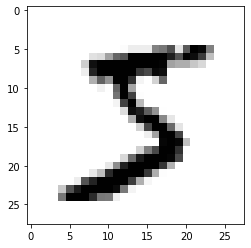

In [74]:
# p.85:
# 데이터가 없음.
plt.imshow(mnist_data[0].reshape(28, 28), cmap=cm.gray_r)

In [66]:
mnist_label = mnist.target
mnist_label

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [67]:
# 7만개
mnist_label.shape 

(70000,)

In [68]:
train_size = 5000

test_size = 500

train_X, test_X, train_y, test_y = model_selection.train_test_split(
    mnist_data, mnist_label, train_size=train_size, test_size=test_size
)

### 텐서 생성 - p.86

In [129]:
import numpy as np
train_X = torch.from_numpy(train_X).float()
# train_y = torch.from_numpy(train_y).long() Error
train_y = torch.from_numpy(train_y.astype(np.int)).long()

test_X = torch.from_numpy(test_X).float()
test_y = torch.from_numpy(test_y.astype(np.int)).long()

TypeError: expected np.ndarray (got Tensor)

In [130]:
print(train_X.shape)
print(train_y.shape)

torch.Size([5000, 784])
torch.Size([5000])


In [132]:
# feature + label
train = TensorDataset(train_X, train_y)

print(train[0])

train_loader = DataLoader(train, batch_size=100, shuffle=True)

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000,

## 신경망 구성

In [141]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 128)
        self.fc6 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.dropout(x, training=self.training)
        x = self.fc6(x)
        return F.log_softmax(x, dim=0)
        


In [142]:
model = Net()

## 모형 학습 - p.91

In [144]:
# loss 함수
# Cross Entropy 손실함수(cost function)
criterion = nn.CrossEntropyLoss()

# 옵티마이저
# Stochastic Gradient Descent

optimizer = optim.SGD(model.parameters(), lr=0.01) # lr = learning rate

# 학습 시작
for epoch in range(1000):
    total_loss = 0
    
    for train_x, train_y in train_loader:
        # grad 초기화
        optimizer.zero_grad()
        
        # Forward - 순전파
        output = model(train_x)
        
        loss = criterion(output, train_y)
        # backward - 역전파
        loss.backward()
        
        # 가중치 업데이트
        optimizer.step()
        
        # 오차 계산
        total_loss += loss.item()
        
    if (epoch +1) % 100 == 0:
        print(epoch+1, total_loss)
        
# 오래 걸려요..

100 21.87411457300186
200 1.9209354808554053
300 0.4302567522972822
400 0.2658351060235873
500 0.17716107208980247
600 0.10764374578138813
700 0.08767174050444737
800 0.06912864570040256
900 0.18570932224247372
1000 0.052440599516557995


In [147]:
result = torch.max(model(test_X).data, 1)[1]

result

tensor([7, 4, 5, 1, 7, 7, 0, 7, 4, 3, 2, 5, 0, 7, 2, 3, 1, 6, 5, 9, 0, 1, 7, 3,
        4, 0, 6, 3, 9, 2, 5, 3, 9, 0, 1, 1, 0, 5, 9, 2, 7, 6, 1, 1, 3, 9, 7, 4,
        5, 7, 2, 3, 7, 2, 2, 1, 5, 4, 2, 8, 9, 9, 6, 2, 9, 1, 8, 7, 6, 4, 1, 5,
        4, 2, 1, 3, 7, 4, 9, 5, 2, 8, 8, 3, 6, 3, 7, 5, 3, 4, 2, 9, 5, 1, 9, 9,
        1, 0, 2, 1, 9, 9, 5, 7, 9, 3, 7, 4, 5, 4, 3, 5, 3, 0, 3, 5, 5, 6, 9, 4,
        0, 4, 8, 1, 2, 2, 9, 3, 7, 8, 1, 0, 8, 4, 3, 9, 3, 9, 2, 5, 9, 8, 0, 8,
        1, 4, 9, 5, 4, 8, 8, 1, 5, 2, 0, 3, 8, 3, 9, 5, 9, 9, 9, 2, 5, 9, 9, 2,
        7, 9, 5, 2, 3, 3, 1, 5, 8, 3, 8, 9, 4, 9, 6, 9, 9, 6, 0, 4, 3, 1, 4, 7,
        2, 6, 4, 3, 9, 8, 7, 2, 9, 3, 3, 3, 0, 5, 0, 5, 6, 2, 4, 4, 3, 0, 7, 9,
        7, 3, 0, 2, 7, 0, 7, 2, 3, 7, 3, 0, 6, 7, 3, 0, 6, 2, 9, 5, 5, 3, 7, 2,
        8, 6, 4, 5, 5, 0, 6, 9, 4, 3, 8, 5, 2, 9, 2, 3, 5, 8, 1, 9, 3, 0, 7, 2,
        1, 5, 3, 7, 5, 5, 6, 1, 3, 9, 0, 8, 1, 3, 3, 5, 2, 3, 4, 2, 0, 2, 2, 1,
        4, 1, 4, 0, 8, 1, 3, 9, 0, 6, 6,

In [148]:
# 정확도
accuracy = sum(test_y.data.numpy() == result.numpy())/ len(test_y.data.numpy())

accuracy

0.906

# 뉴스 기사 분류 - p.95

### 학습데이터 준비 p.20
- http://kristalinfo.com/TestCollections/#hkib

In [160]:
# http://kristalinfo.com/TestCollections/#hkib
import os
import requests
import tarfile

gzip_url = 'http://kristalinfo.com/download/hkib-20000-40075.tar.gz'

filename = './data/hkib/hkib-20000-40075.tar.gz'
base_dir = os.path.dirname(filename)

if not os.path.exists(os.path.dirname(filename)):
    os.makedirs(os.path.dirname(filename))

# 크롤링
with requests.get(gzip_url, stream=True) as resp:
    with open(filename, 'wb') as f:
        while True:
            chunk = resp.raw.read(1024, decode_content=True)
            if not chunk:
                break
            f.write(chunk)



A


In [166]:
# 압축 풀기
with tarfile.open(filename, "r:gz") as tar:
    tar.extractall(base_dir)

## 데이터 import - p.96

In [181]:
import os 

# 정규표현식
import re

from sklearn import datasets, model_selection
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# 형태소 분석기 
try:
    from konlpy.tag import Hannanum, Kkma
except ModuleNotFoundError as e:
    import sys
    !{sys.executable} -m pip install konlpy
finally:
    from konlpy.tag import Hannanum, Kkma
    

# pandas
import pandas as pd

# numpy
import numpy as np


  Using cached https://files.pythonhosted.org/packages/e5/3d/4e983cd98d87b50b2ab0387d73fa946f745aa8164e8888a714d5129f9765/konlpy-0.5.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/28/63/784834e8a24ec2e1ad7f703c3dc6c6fb372a77cc68a2fdff916e18a4449e/JPype1-0.7.0.tar.gz
  Running setup.py install for JPype1 ... done


In [182]:
base_dir

'./data/hkib'

In [219]:
import glob
target_dir = os.path.join(base_dir, 'HKIB-20000')
cat_dirs = ['health', 'economy', 'science', 'education', 'culture', 'society', 'industry', 'leisure', 'politics']
cat_prefixes = ['건강', '경제', '과학', '교육', '문화', '사회', '산업', '여가', '정치']

files = os.listdir(target_dir)
print(files)

for file in files:
    if not file.endswith('.txt'):
        continue

    # 기사 단위 분할 -> 리스트
    with open(target_dir + '/' + file) as curfile:
        doc_cnt = 0
        docs = []
        curr_doc = None
        
        for curr_line in curfile:
            # 매 라인 읽기
            if curr_line.startswith('@DOCUMENT'):
                # 시작점 찾기
                if curr_doc is not None:
                    # 읽고 있는 문서가 있으면 붙이기
                    docs.append(curr_doc)
                    
                curr_doc = curr_line
                doc_cnt = doc_cnt +1
                continue
            curr_doc = curr_doc + curr_line

        # 마지막 것 넣어줘야함 (책 오류)
        docs.append(curr_doc)
        print(len(docs), docs[-1]==docs[-2])

    # 기사 분류
    for doc in docs:
        doc_lines = doc.split('\n')
        doc_no = doc_lines[1][9:] # doc_lines[1].split(':')[1].strip()
        
        # 주제 추출
        doc_cat03 = ''
        for line in doc_lines[:10]:
            if line.startswith("#CAT'03"):
                doc_cat03 = line[10: ]
                break
        
        # 주제별로 디렉토리 정리
        for cat_prefix in cat_prefixes:
            if doc_cat03.startswith(cat_prefix):
                # prefix로 시작하는지 확인
                dir_index = cat_prefixes.index(cat_prefix) # index 맞춰서 저장 --> 폴더명은 영문
                break
        
        # 문서 정보 제거, 기사 본문만 남기기
        filtered_lines = []
        for line in doc_lines:
            if not (line.startswith('#') or line.startswith('@')):
                # 메타태그 제외 append
                filtered_lines.append(line)
        
        filepath = os.path.join(target_dir, cat_dirs[dir_index])
        filename = os.path.join(filepath, 'hkib-' + doc_no + '.txt')
        
        
        if not os.path.exists(filepath):
            os.makedirs(filepath)

        with open(filename, 'w') as f:
            f.write('\n'.join(filtered_lines))
        
            


['hkib20000-cat03-file3.categories', 'economy', 'leisure', 'hkib20000-cat07-all.categories', 'hkib20000-cat07-file3.categories', 'hkib20000-cat03-file1.categories', 'hkib20000-cat07-file4.categories', 'health', 'education', 'science', 'society', 'hkib20000-cat03-file4.categories', 'hkib20000-cat03-all.categories', 'hkib20000-cat07-file1.categories', 'hkib20000-cat07-file2.categories', 'hkib20000-cat03-file2.categories', 'industry', 'HKIB-20000_003.txt', 'HKIB-20000_002.txt', 'hkib20000-cat03-file5.categories', 'HKIB-20000_001.txt', 'HKIB-20000_005.txt', 'HKIB-20000_004.txt', 'hkib20000-cat07-file5.categories', 'culture']
4029 False
4048 False
3988 False
4022 False
3913 False


In [267]:
# 예제 6.16~6.17
# 예제 6.17로 진행. (6.16은 의미X)
dirs = ['education', 'health']

# 기사에 출현하는 단어와 레이블 저장 리스트
# features
x_ls = []

# target_values
y_ls = []

# 필요없음
# tmp1 = [] # 임시 토큰 저장소
# tmp2 = '' # 임시 문자열 저장소
tmp = ''

# tokenizer = Hannnum()
tokenizer = Kkma()

#각 폴더의 파일을 하나씩 읽음
for i, d in enumerate(dirs):
    
    # 해당 디렉토리에 파일들 ['education', 'health']
    base_dir = target_dir + '/' + d
    files = os.listdir(base_dir)
    
    for fid, file in enumerate(files):
        with open(base_dir + '/' + file, 'r', encoding='utf-8') as f:
            raw = f.read()
            
            # reg_raw = re.sub(r'[0-9a-zA-Z]', '', raw) # 숫자 및 영어 제거 (? - 안해도 괜찮아 보임)
            reg_raw = re.sub(r'[-\'@#:/◆▲0-9a-zA-Z<>!-"*\(\)]', '', raw) # 윈도우는 [ㅁ+한자키], 맥은 [cmd+ctrl+space
            
            reg_raw = re.sub(r'[ ]+', ' ', reg_raw)
            reg_raw = reg_raw.replace('\n', ' ') # 줄바꿈 없음
        
        # 형태소 분석 -> 명사만 추출하여 리스트 생성
        tokens = tokenizer.nouns(reg_raw)
        
        tmp = ' '.join(tokens)
        
        # 필요 없음
        # for token in tokens: # 토큰 저장
        # tmp1.append(token)
        
        x_ls.append(tmp)
        y_ls.append(i) # 기사 주제 레이블 (label index)
        if fid % 50 == 0:
            print("{}-[{}/{}] 진행중...".format(i+1, fid+1, len(files)+1))
        
            

1-[1/567] 진행중...
1-[51/567] 진행중...
1-[101/567] 진행중...
1-[151/567] 진행중...
1-[201/567] 진행중...
1-[251/567] 진행중...
1-[301/567] 진행중...
1-[351/567] 진행중...
1-[401/567] 진행중...
1-[451/567] 진행중...
1-[501/567] 진행중...
1-[551/567] 진행중...
2-[1/436] 진행중...
2-[51/436] 진행중...
2-[101/436] 진행중...
2-[151/436] 진행중...
2-[201/436] 진행중...
2-[251/436] 진행중...
2-[301/436] 진행중...
2-[351/436] 진행중...
2-[401/436] 진행중...


In [268]:
len(x_ls), len(y_ls)

(1001, 1001)

In [372]:
pd.DataFrame(x_ls).head()

,0
0,정부 일 충북 충북대 대 신임 총장 대학 이랑 이랑호 호 학원장 임명 등 개 국립대...
1,쇼 오락 노영 노영심의 심의 음악 음악회양희은 회양 희은 편 하오 하오시분 시분 양...
2,초 초중고 중고 교사 자신 자부심 교직 전념 전념키 키 위 무엇 처우 처우개선 개선...
3,연세대 일 학년도 학기 대학원 신입생 전형 전형때 때 정원 이내 학부 학부성적 성적...
4,서울대 행정 행정대학원 대학원 박동 유훈 조석 교수 정념 정념퇴임 퇴임 기념식 일 ...


In [373]:
print(x_ls[0])

정부 일 충북 충북대 대 신임 총장 대학 이랑 이랑호 호 학원장 임명 등 개 국립대 인사 단행 부산 부산수산대 수산 장 장선덕 선덕 부산수산해양대학 해양 목 목포대 포대 이태 이태근 근 대학원 삼척 삼척산업대학 산업 김영달 교수 대구 대구교육대 교육대 노 노정식 정식 교 교수가 수가 공주 공주교육대 문 문낙진 낙진


In [374]:
print(y_ls)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [375]:
## numpy 배열
x_array = np.array(x_ls)
y_array = np.array(y_ls)

## 단어 출현 횟수 세기
# sklearn 변환기 # https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
cntvec = CountVectorizer() 
x_cntvecs = cntvec.fit_transform(x_array)
x_cntarray = x_cntvecs.toarray() # matrix.toarray()

# 데이터 프레임으로 변환
df = pd.DataFrame(x_cntarray)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,33562,33563,33564,33565,33566,33567,33568,33569,33570,33571
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [376]:
### 단어와 단어의 인덱스 표시

## CountVectorizer().vocabulary_: 단어와 인덱스 매핑
## dict 형식: { '<단어>': <index>, ...}
for k, v in sorted(cntvec.vocabulary_.items(), key=lambda x: x[1]):
    # 사전식 정렬
    print(k, v)


가가 0
가가치 1
가검물 2
가게 3
가격 4
가격등 5
가격명 6
가격문란 7
가격변동 8
가격산정 9
가격상승요인 10
가격안정 11
가격인상 12
가격인하등 13
가격인하조치 14
가격자율 15
가격표시 16
가격현실화 17
가계 18
가계대출금리 19
가계생활자 20
가계수표 21
가공 22
가공공장 23
가공식품 24
가공품 25
가공품임 26
가구 27
가금 28
가급적 29
가기 30
가기위 31
가까이 32
가난 33
가늠 34
가능 35
가능대학 36
가능성 37
가능하다 38
가닥 39
가담 40
가동 41
가동국교 42
가두 43
가드너 44
가드너씨 45
가등 46
가락 47
가락본동 48
가래 49
가량 50
가량백명 51
가량인 52
가려움 53
가려움증 54
가로 55
가루 56
가루등 57
가리아 58
가마 59
가마귀 60
가마솥 61
가마솥더위 62
가망 63
가명 64
가문 65
가물치 66
가뭄 67
가뭄대책회의 68
가미 69
가발 70
가발제조업 71
가방 72
가방등 73
가방속 74
가벼운 75
가부 76
가부제기초과학 77
가사 78
가사교과서 79
가산 80
가산점 81
가상 82
가상공간 83
가상캠퍼스 84
가설 85
가세 86
가속 87
가속화 88
가속화등 89
가수 90
가스 91
가스공급 92
가스공사 93
가스버너 94
가스시설등 95
가스중독 96
가스통 97
가슴 98
가슴등 99
가슴속 100
가시 101
가시고기 102
가시화 103
가식 104
가신 105
가야 106
가야고 107
가야고졸 108
가양 109
가업 110
가업후계자 111
가업후계자고려대 112
가역성 113
가연성 114
가열 115
가열식품 116
가열해진 117
가와사키 118
가와사키시거주 119
가요 120
가요반주기 121
가요제 122
가용 123
가용성 124
가용성분 125
가용성분과 126
가운 127
가운데 128
가을 129
가을정기국회 130
가을철 131
가을학기 132
가의 133
가이드 134


검사신청창구 1230
검사실 1231
검사의뢰 1232
검사인력 1233
검사정 1234
검사정원법시행령 1235
검사제 1236
검사제도 1237
검사중이 1238
검사직 1239
검사포함 1240
검사후 1241
검산 1242
검산작업 1243
검색 1244
검색기 1245
검색등 1246
검시 1247
검시결과 1248
검역 1249
검역당국 1250
검역소 1251
검역소나 1252
검역원 1253
검은색 1254
검정 1255
검정고시 1256
검정고시전문 1257
검정고시출신자 1258
검증 1259
검증키 1260
검진 1261
검찰 1262
검찰국장 1263
검찰수사 1264
검찰수사결과 1265
검찰수사관 1266
검찰청 1267
검찰청사 1268
검찰청사무기구규정 1269
검출 1270
검토 1271
검토결과 1272
검토작업 1273
검토중 1274
검토중이 1275
검토중인 1276
검토키 1277
검토하 1278
검토해야겠지 1279
겁내 1280
겁내서 1281
것거 1282
것독서 1283
것등 1284
것로 1285
것를 1286
것식사 1287
것외 1288
것으 1289
것인가 1290
겄제 1291
겉면 1292
겉보리 1293
겉옷 1294
겉핥기 1295
게놈 1296
게놈유전자단편 1297
게놈지도 1298
게놈학연구실 1299
게놈해석법 1300
게다 1301
게르노트 1302
게리 1303
게릴 1304
게릴라 1305
게릴라식 1306
게속 1307
게시 1308
게시판 1309
게우젓 1310
게이 1311
게이그룹 1312
게이문제 1313
게이트 1314
게임 1315
게임장인 1316
게임진행도중 1317
게장 1318
게재 1319
게재논문 1320
게재의뢰 1321
겠다 1322
겨냥 1323
겨레 1324
겨레모임가칭 1325
겨울 1326
겨울골프 1327
겨울날 1328
겨울날씨 1329
겨울농활 1330
겨울농활계획 1331
겨울농활단 1332
겨울방학중 1333
겨울철 1334
겨울철임 1335


골드스타인 2281
골머리 2282
골목 2283
골몰 2284
골반 2285
골수 2286
골수염 2287
골육 2288
골이식 2289
골이식편 2290
골자 2291
골재 2292
골절 2293
골종양 2294
골초 2295
골치 2296
골탕 2297
골퍼 2298
골프 2299
골프규칙 2300
골프규칙서 2301
골프금지 2302
골프때문 2303
골프라운드전략 2304
골프랑스대통령 2305
골프모임 2306
골프불가 2307
골프비용 2308
골프약속 2309
골프연습 2310
골프연습장 2311
골프용어 2312
골프인구 2313
골프자체 2314
골프장 2315
골프장구릉지 2316
골프장내 2317
골프장대표 2318
골프장등 2319
골프장밀집지역 2320
골프장부킹 2321
골프장사업자 2322
골프장수 2323
골프장연습장등 2324
골프장측이 2325
골프장회칙 2326
골프채 2327
골프클럽 2328
골프협회 2329
골프협회회장 2330
골프회원권 2331
곰돌이 2332
곰취 2333
곰팡이 2334
곰팡이균 2335
곳곳 2336
곳등 2337
곳이상 2338
곳중 2339
공간 2340
공감 2341
공개 2342
공개강좌 2343
공개경쟁 2344
공개모집총장 2345
공개모집키 2346
공개서한 2347
공개선발 2348
공개입찰 2349
공개적 2350
공개질의서 2351
공개채용 2352
공개초빙형태 2353
공개키 2354
공개해선 2355
공격 2356
공계 2357
공계학과 2358
공고 2359
공고생의 2360
공고일월일 2361
공고졸업자 2362
공공 2363
공공근로요원 2364
공공기관 2365
공공도서 2366
공공도서관 2367
공공보건기관 2368
공공성 2369
공공성강화 2370
공공시설 2371
공공의료기관 2372
공공임대주택 2373
공공자금관리기금 2374
공과 2375
공과금 2376
공과대 2377
공과대가 2378
공과대학 2379
공과대학원 2380
공과대학원중 2381
공관 

교육구차원 3391
교육구청 3392
교육기간 3393
교육기관 3394
교육기능역할 3395
교육기반조성 3396
교육기본시설 3397
교육기본시설등 3398
교육기자재 3399
교육기회 3400
교육내실 3401
교육내용 3402
교육년한도 3403
교육단위 3404
교육담당자인 3405
교육당국 3406
교육대 3407
교육대개혁조치 3408
교육대상자 3409
교육대학 3410
교육등 3411
교육때문 3412
교육론 3413
교육를 3414
교육목표 3415
교육문제 3416
교육미디어센터 3417
교육발전 3418
교육방 3419
교육방법 3420
교육방송 3421
교육방송원 3422
교육방식 3423
교육방향 3424
교육법 3425
교육법개 3426
교육법시행령 3427
교육보험형 3428
교육부 3429
교육부관계자 3430
교육부기자실 3431
교육부내 3432
교육부내외 3433
교육부당국 3434
교육부령 3435
교육부문 3436
교육부산하 3437
교육부실 3438
교육부일각 3439
교육부장관 3440
교육부장관상대상 3441
교육부차관 3442
교육부측 3443
교육분야 3444
교육붐 3445
교육비 3446
교육비교원급여 3447
교육비리 3448
교육비부담때문 3449
교육비용 3450
교육비증가추세 3451
교육사업 3452
교육사업가 3453
교육사업본부 3454
교육산업 3455
교육생 3456
교육서 3457
교육선진국 3458
교육성과 3459
교육소비자 3460
교육소위위원장 3461
교육속 3462
교육수요 3463
교육수요자 3464
교육수준 3465
교육시간 3466
교육시기 3467
교육시설 3468
교육시설등 3469
교육시장 3470
교육시장개방 3471
교육실습 3472
교육실태 3473
교육심리학과 3474
교육여건 3475
교육여건상 3476
교육여건평가점수 3477
교육연구 3478
교육연구원 3479
교육열 3480
교육예산 3481
교육원 3482
교육월보 3483
교육위 3484
교육위기 34

급선전염병 4662
급성 4663
급성설사 4664
급성전염병 4665
급성출혈성결막염 4666
급성폐렴 4667
급속 4668
급속도 4669
급속도로 4670
급수 4671
급수시설 4672
급식 4673
급식소 4674
급식학교 4675
급신 4676
급신장 4677
급여 4678
급여기간 4679
급여범위 4680
급여수 4681
급여수준 4682
급여액 4683
급여확대 4684
급이상 4685
급정교 4686
급정교사 4687
급중고 4688
급증 4689
급증세 4690
급증추세 4691
급학교진학 4692
긍이 4693
긍적적으 4694
긍정적 4695
긍지 4696
기가 4697
기각 4698
기간 4699
기간가산금리등 4700
기간내 4701
기간동안 4702
기간동안고교생 4703
기간산업체 4704
기간중 4705
기간학제 4706
기개 4707
기거 4708
기계 4709
기계공 4710
기계공학교육 4711
기계기술분야등 4712
기계등 4713
기계설계등 4714
기계설비 4715
기계소음 4716
기계실 4717
기계심장 4718
기계적 4719
기계통 4720
기계학습 4721
기고 4722
기공 4723
기공사 4724
기공식 4725
기관 4726
기관간의 4727
기관장 4728
기관중 4729
기관지 4730
기관지염 4731
기관지천식 4732
기관투자가 4733
기교 4734
기교면 4735
기구 4736
기구등 4737
기구신설 4738
기구제조업 4739
기금 4740
기금조성 4741
기금지원 4742
기금확보 4743
기기 4744
기기과열등 4745
기내 4746
기내변기 4747
기년 4748
기념 4749
기념관 4750
기념논 4751
기념사업 4752
기념사업실무위원회 4753
기념사업위원회 4754
기념식 4755
기념품 4756
기념품만원 4757
기념행사 4758
기능 4759
기능껌 4760
기능사 4761
기능성 4762
기능성제품 4763
기능수행 4764
기능장애 4765
기능적 4766


남학 5668
남학생 5669
남한 5670
남한가요 5671
남한가요임 5672
남해 5673
남해군 5674
납기 5675
납득 5676
납부 5677
납부거부 5678
납부내용 5679
납부창구 5680
납북 5681
납북당시 5682
납북소식 5683
납북이후 5684
납북자 5685
납입 5686
납입거부 5687
납입금 5688
납치 5689
납치당시 5690
납치됐 5691
납치등 5692
납품 5693
납품업체 5694
낭독 5695
낭보 5696
낭비 5697
낭패 5698
낭포성섬유증 5699
낮기온 5700
낮술 5701
낮아지 5702
낮아진 5703
낯짝 5704
낱말 5705
내가 5706
내고 5707
내과 5708
내과교수 5709
내과팀 5710
내국 5711
내국인 5712
내국인간 5713
내국인과의 5714
내국인접촉 5715
내규 5716
내기 5717
내년 5718
내년도 5719
내년도입시 5720
내년말 5721
내년부 5722
내년월 5723
내년입시 5724
내년중 5725
내년초 5726
내달 5727
내달말 5728
내달초 5729
내란 5730
내력벽 5731
내리막 5732
내리막퍼팅 5733
내림세 5734
내면 5735
내면역세포 5736
내무 5737
내무부 5738
내방 5739
내뱉어 5740
내버 5741
내부 5742
내부경쟁 5743
내부방침 5744
내부비리 5745
내부적 5746
내부협의 5747
내분비 5748
내분비교란 5749
내분비내과 5750
내분비질환 5751
내색 5752
내색얼 5753
내서 5754
내성 5755
내성바이러스 5756
내성적 5757
내세 5758
내시경 5759
내시경검사 5760
내신 5761
내신관리방법등 5762
내신내용 5763
내신등급 5764
내신반영 5765
내신비리 5766
내신비율 5767
내신성적 5768
내신성적관리 5769
내신성적반영비율 5770
내신성적비교 5771
내신성적산정 5772
내신성적산출방식 5773
내신성적제도 577

당혹 6773
당황 6774
대가 6775
대간 6776
대강당 6777
대개 6778
대개교 6779
대거리 6780
대건 6781
대건식품 6782
대검 6783
대결 6784
대결상황 6785
대경 6786
대경대 6787
대경여상 6788
대경여상설립자 6789
대경여상은 6790
대계 6791
대고객 6792
대곤 6793
대공보 6794
대공원 6795
대광고 6796
대교 6797
대교수 6798
대교측 6799
대교협 6800
대교협산하 6801
대교협의 6802
대구 6803
대구가톨릭대학 6804
대구개교 6805
대구광역시 6806
대구교대 6807
대구교육대 6808
대구동산의료원 6809
대구미래대 6810
대구병원 6811
대구시 6812
대구여상 6813
대구전문대 6814
대구지검 6815
대구지방교정청 6816
대구지역 6817
대구직할시장기 6818
대구진학학원 6819
대구탕 6820
대구탕반 6821
대구효성가톨릭 6822
대국민 6823
대군 6824
대궐 6825
대규 6826
대규모 6827
대규모집회 6828
대극 6829
대금 6830
대기 6831
대기물량 6832
대기시간 6833
대기실 6834
대기실과 6835
대기업 6836
대기업체 6837
대기오염 6838
대기자 6839
대기장소 6840
대까지 6841
대꾸 6842
대나 6843
대나무 6844
대낮 6845
대내 6846
대내외 6847
대년 6848
대농 6849
대다수 6850
대단원 6851
대단위 6852
대담 6853
대담배 6854
대담배선전포고 6855
대담프로 6856
대답 6857
대답했 6858
대당 6859
대대적 6860
대덕 6861
대덕연구단지 6862
대덕연구단지내 6863
대덕연구단지안 6864
대도 6865
대도시 6866
대도제약 6867
대동 6868
대동고사 6869
대동군 6870
대동문 6871
대동문가족 6872
대동약품 6873
대두 6874
대등 6875
대략 6876
대량 6877
대량배양 6878
대

동병원 7798
동부 7799
동부지청 7800
동북 7801
동북아 7802
동북아시아인 7803
동사무소 7804
동산 7805
동산기독병원 7806
동산병원 7807
동산의료원 7808
동상 7809
동생 7810
동생소식 7811
동서 7812
동서공과대학 7813
동서공대 7814
동서공대등 7815
동서대개교 7816
동서양 7817
동서울병원 7818
동석 7819
동성애 7820
동성애그룹 7821
동성애남성 7822
동성애자 7823
동성연애 7824
동성연애자 7825
동센터 7826
동수 7827
동수원대명병원 7828
동숙 7829
동순위 7830
동숭 7831
동숭동 7832
동시 7833
동시에 7834
동시통역기능 7835
동시합격 7836
동식물 7837
동신 7838
동신제약 7839
동심 7840
동아 7841
동아공고 7842
동아공과학원 7843
동아그룹 7844
동아대 7845
동아대금속공학과 7846
동아대등 7847
동아대병원 7848
동아리 7849
동아리대표자회의 7850
동아리뒷풀이 7851
동아리방 7852
동아리소속 7853
동아리연합회 7854
동아방송대 7855
동아시아 7856
동아위생 7857
동아인재대 7858
동아일보 7859
동아제약 7860
동아제약대표 7861
동안 7862
동안서울 7863
동암 7864
동양 7865
동양공전 7866
동양공전등 7867
동양권 7868
동양대개교 7869
동양사 7870
동양사학과 7871
동양의학 7872
동양인 7873
동양인임 7874
동양제과 7875
동양화 7876
동양화과 7877
동업자 7878
동연 7879
동요 7880
동요곡 7881
동우 7882
동원 7883
동원고 7884
동원대상지역내 7885
동위원소 7886
동유럽 7887
동유럽국가 7888
동윤 7889
동의 7890
동의서 7891
동의여부 7892
동의하 7893
동이 7894
동인 7895
동인빌딩 7896
동인학원 7897
동일 7898
동일계 7899
동일분야 7900

면면 8953
면모 8954
면목 8955
면목동 8956
면박스 8957
면방 8958
면방업계 8959
면봉 8960
면역 8961
면역결핍증 8962
면역결핍증를 8963
면역기능 8964
면역능력 8965
면역력 8966
면역반응 8967
면역부전 8968
면역성 8969
면역성피부질환 8970
면역세포 8971
면역억제제 8972
면역억제제임상실험 8973
면역질환 8974
면역체 8975
면역체계 8976
면역치료제 8977
면역캡슐 8978
면역효과 8979
면적 8980
면접 8981
면접고사 8982
면접고사때 8983
면접고사일은 8984
면접관 8985
면접내용확인 8986
면접내용확인거부 8987
면접등 8988
면접만 8989
면접방법 8990
면접방식 8991
면접불응 8992
면접비중 8993
면접시간 8994
면접시험 8995
면접시험때 8996
면접일은 8997
면접일인 8998
면접카드 8999
면접태도 9000
면제 9001
면죄부 9002
면지역 9003
면직 9004
면톱 9005
면학 9006
면학분위기 9007
면학풍토 9008
면학풍토등 9009
면학환경 9010
면허 9011
면허대여 9012
면허소지자 9013
면허시험 9014
면허시험과목 9015
면허시험장 9016
면허자 9017
면허자격정 9018
면허정지 9019
면허정지사유 9020
면허정지처분 9021
면허증 9022
면화 9023
면화농장 9024
멸종 9025
멸종위기 9026
멸치 9027
명가 9028
명가운데 9029
명고 9030
명고려대 9031
명과 9032
명근 9033
명기 9034
명꼴 9035
명남자 9036
명남학생 9037
명년 9038
명단 9039
명단오전 9040
명당 9041
명대 9042
명대등 9043
명덕 9044
명덕고 9045
명덕외고 9046
명도 9047
명동 9048
명동사건 9049
명동성당 9050
명등 9051
명령 9052
명령불복종 9053
명료성 9054
명륜 9055
명륜동 9056
명를 905

바토리 10161
바톤 10162
바트 10163
바티마스타트 10164
바티스마트 10165
박경 10166
박경선여사와의 10167
박관용 10168
박교수 10169
박규회 10170
박김치 10171
박김치냉면 10172
박동 10173
박동치료 10174
박래 10175
박래부 10176
박력 10177
박만 10178
박만호 10179
박멸 10180
박모 10181
박모군 10182
박모씨 10183
박물관 10184
박범벅 10185
박병구씨세로 10186
박봉 10187
박봉식씨 10188
박부장 10189
박사 10190
박사가 10191
박사과정 10192
박사과정설치 10193
박사급 10194
박사등 10195
박사미 10196
박사은 10197
박사팀 10198
박사팀성승 10199
박사학위 10200
박사학위논문 10201
박사학위소지자 10202
박사학위수여대학 10203
박상충 10204
박새 10205
박성상 10206
박세 10207
박세직 10208
박수 10209
박숙자 10210
박순태씨 10211
박순호씨 10212
박스 10213
박승 10214
박승안출제위원장 10215
박씨 10216
박약 10217
박영관박사 10218
박영민보건 10219
박옥 10220
박옥현교수환경 10221
박용 10222
박용균 10223
박용길장로와의 10224
박용대교장 10225
박원 10226
박원영씨 10227
박원장 10228
박원장팀 10229
박위원장 10230
박유미 10231
박유정여 10232
박윤흔 10233
박은식 10234
박은식선생 10235
박의 10236
박의원 10237
박의중 10238
박인규씨 10239
박인도 10240
박일의 10241
박전 10242
박전회장 10243
박전희 10244
박절 10245
박정 10246
박정애 10247
박정애가 10248
박정희 10249
박주 10250
박주병 10251
박주병기자 10252
박지 10253
박지선씨 10254
박지원 10255
박진 10256


병리 11343
병리검사실 11344
병리과은 11345
병리사 11346
병리사등 11347
병리학 11348
병리학자 11349
병리해부 11350
병리해부학 11351
병리현상 11352
병마 11353
병무 11354
병발증 11355
병사 11356
병상 11357
병색 11358
병설 11359
병세 11360
병세가 11361
병세회복 11362
병소 11363
병수 11364
병수발 11365
병순 11366
병순할머니 11367
병실 11368
병약자 11369
병역 11370
병역기 11371
병역문제 11372
병역법 11373
병역의무 11374
병역특례 11375
병용 11376
병용투여 11377
병원 11378
병원간 11379
병원균 11380
병원급 11381
병원비 11382
병원성 11383
병원소 11384
병원신세 11385
병원실정 11386
병원안내 11387
병원영양사 11388
병원장 11389
병원종사자 11390
병원진단 11391
병원체 11392
병원체인 11393
병원측 11394
병원협회 11395
병의원 11396
병이 11397
병이오 11398
병인 11399
병자체 11400
병자호란 11401
병증 11402
병지 11403
병치 11404
병치료 11405
병풍 11406
병학 11407
병합 11408
병합치료법 11409
병행 11410
병행실시 11411
병행치료 11412
병환자 11413
병희 11414
보가 11415
보건 11416
보건계 11417
보건계장 11418
보건과장 11419
보건과장직 11420
보건관 11421
보건관련법규 11422
보건관리 11423
보건교육 11424
보건교육사업 11425
보건교육전문가 11426
보건국장 11427
보건기관 11428
보건단체 11429
보건담당차관보 11430
보건당국 11431
보건대 11432
보건대등 11433
보건대학원 11434
보건대학원교수 11435
보건발전 11436
보건범죄 11437
보건복지부 11438
보

북한측 12236
북한학생 12237
북핵 12238
분가량 12239
분간 12240
분거리 12241
분경 12242
분과 12243
분과시용 12244
분과위 12245
분과위분과위원 12246
분교 12247
분규 12248
분기 12249
분기당 12250
분기회로 12251
분납 12252
분노 12253
분노감과 12254
분단 12255
분담 12256
분당 12257
분당구 12258
분당부근 12259
분당신도시 12260
분당신캠퍼스 12261
분당신캠퍼스경기 12262
분량 12263
분류 12264
분류작업 12265
분를 12266
분리 12267
분리개발 12268
분리관 12269
분리선발 12270
분리출제 12271
분마 12272
분마기 12273
분만 12274
분만실 12275
분만예정 12276
분만중 12277
분말 12278
분말제제 12279
분명 12280
분반 12281
분별 12282
분별력 12283
분비 12284
분비물 12285
분비물등 12286
분산 12287
분석 12288
분석가 12289
분석가능 12290
분석결과 12291
분석기 12292
분석대상 12293
분석대상인 12294
분석됐 12295
분석력 12296
분석법 12297
분석보고서 12298
분석자료 12299
분석활동 12300
분쇄 12301
분야 12302
분야별 12303
분야여 12304
분야이구 12305
분야이상 12306
분양 12307
분양상가 12308
분양업무 12309
분업 12310
분열 12311
분열증 12312
분위기 12313
분위기속 12314
분유 12315
분유영양아 12316
분의 12317
분의가량 12318
분의본인부담금 12319
분의수 12320
분의이 12321
분의이상 12322
분자 12323
분자공학부군 12324
분자구조 12325
분자량 12326
분자미생물연구소 12327
분자분석법 12328
분자생물 12329
분자생물학 12330
분자생물학연구소장 12331
분자세계 

삼권 13351
삼길가 13352
삼남 13353
삼남매 13354
삼남면 13355
삼문 13356
삼문민정부 13357
삼봉집 13358
삼삼오오 13359
삼성 13360
삼성가족 13361
삼성건설 13362
삼성계열사 13363
삼성그룹 13364
삼성동 13365
삼성물산 13366
삼성병원 13367
삼성생명 13368
삼성서울병원 13369
삼성아파트 13370
삼성의료원 13371
삼성인력개발원 13372
삼성전자 13373
삼성전자대표 13374
삼성측 13375
삼성측이 13376
삼수 13377
삼신 13378
삼신각 13379
삼아 13380
삼양사 13381
삼엽초 13382
삼육 13383
삼육간호보건대가 13384
삼육간호보건대의 13385
삼육보건전문대 13386
삼육보건전문대학장 13387
삼일 13388
삼일제약 13389
삼척 13390
삼척산업 13391
삼척산업대 13392
삼척산업대학 13393
삼천리 13394
삼출성 13395
삼출액 13396
삼페 13397
삼풍 13398
삼풍백화점 13399
삼호 13400
삼호부부 13401
삼화 13402
삼화건업 13403
삽시 13404
삽시다라 13405
삽입 13406
삽주 13407
삽주나물 13408
상가 13409
상가건물 13410
상가신축 13411
상거래 13412
상경 13413
상경계열 13414
상경대 13415
상경대학 13416
상계 13417
상계동 13418
상계동씨 13419
상계백병원 13420
상고 13421
상공 13422
상공부 13423
상공자원부 13424
상공자원부와 13425
상공회의소 13426
상과 13427
상관 13428
상관관계 13429
상관례 13430
상관성 13431
상관행 13432
상교 13433
상교장 13434
상구씨 13435
상궤 13436
상근 13437
상근보직교원 13438
상근부회장 13439
상금 13440
상급 13441
상급생의 13442
상급학교 13443
상급학교진 13444
상급학교진

섭군 14456
섭는 14457
섭렵 14458
섭씨 14459
섭씨천도 14460
섭죽 14461
섭취 14462
섭취량 14463
섭취열량 14464
섭취허용량 14465
섭취후 14466
성가 14467
성감 14468
성검사 14469
성검사과목 14470
성게 14471
성게국백반 14472
성격 14473
성격차이 14474
성결 14475
성고문사건 14476
성공 14477
성공가능성 14478
성공사례 14479
성공사례등 14480
성공여부 14481
성공적 14482
성공회 14483
성공회대 14484
성과 14485
성과학 14486
성관계 14487
성관계중 14488
성관련조사 14489
성광고 14490
성교 14491
성교시 14492
성교육 14493
성군 14494
성규 14495
성균관 14496
성균관대 14497
성균관대가 14498
성균관대생 14499
성균관대의 14500
성균관대학 14501
성균관박사 14502
성근 14503
성근씨 14504
성금 14505
성금전달후 14506
성기 14507
성기관 14508
성기능 14509
성기능장애 14510
성기능장애자 14511
성기절단 14512
성기접합수술 14513
성남 14514
성남시 14515
성남시내 14516
성년 14517
성년자 14518
성능 14519
성능향상 14520
성담론 14521
성당 14522
성대 14523
성대개교 14524
성대등 14525
성대보조기 14526
성덕대 14527
성도 14528
성동 14529
성동구 14530
성동여자실업고 14531
성동여자실업고등학교 14532
성됐 14533
성마리아나의과대 14534
성만 14535
성면 14536
성명 14537
성명서 14538
성모 14539
성모병원 14540
성모병원등 14541
성모여고생 14542
성묘 14543
성문 14544
성문여고 14545
성문제 14546
성문화 14547
성문화연구회 14548
성문화축제 14549
성문화축제중 14550
성범죄 1

수집 15698
수차 15699
수차례 15700
수천 15701
수천만 15702
수천만명 15703
수천명의 15704
수천여건 15705
수축 15706
수축기 15707
수축기혈압 15708
수축제 15709
수출 15710
수출계약 15711
수출국 15712
수출길이 15713
수출대책회의 15714
수출신고제 15715
수출신고제가 15716
수출우리나라 15717
수출입 15718
수출입규제 15719
수출입업 15720
수출중단 15721
수출품 15722
수출품전시 15723
수치 15724
수치도 15725
수치을 15726
수칙 15727
수컷 15728
수탁 15729
수탁업무 15730
수퇘지 15731
수퍼 15732
수퍼옥시드 15733
수평 15734
수평가제 15735
수평구조 15736
수포 15737
수표 15738
수표이면 15739
수표조회 15740
수프 15741
수프림 15742
수하 15743
수학 15744
수학경시대회 15745
수학과 15746
수학과교수 15747
수학과목 15748
수학관련 15749
수학교육 15750
수학능력 15751
수학능력반 15752
수학능력시험 15753
수학능력시험백 15754
수학능력시험성적 15755
수학능력시험제 15756
수학능력시험제가 15757
수학능력시험횟수 15758
수학능역 15759
수학답안 15760
수학등 15761
수학를 15762
수학백점 15763
수학선택학생 15764
수학수학 15765
수학시험 15766
수학여행 15767
수학여행경비 15768
수학여행단 15769
수학여행지 15770
수학여행지가 15771
수학여행철 15772
수학자연계열 15773
수학적 15774
수학출제교수 15775
수학회 15776
수한 15777
수해 15778
수해이후 15779
수행 15780
수허수지원 15781
수험 15782
수험과목 15783
수험부담 15784
수험생 15785
수험생간의 15786
수험생과 15787
수험생반응 15788
수험생위주

실종사건때 16952
실종이후 16953
실증 16954
실직 16955
실직자 16956
실직자자녀 16957
실질 16958
실질경쟁률 16959
실질반영비율 16960
실질적 16961
실책 16962
실천 16963
실천대회 16964
실천력 16965
실천방안 16966
실천방안세미나 16967
실천의지 16968
실천적 16969
실천차원 16970
실천프로그램 16971
실천하라 16972
실체 16973
실추 16974
실태 16975
실태조사 16976
실태조사기간중 16977
실태조사등 16978
실태조사보고서 16979
실토 16980
실패 16981
실행 16982
실행가능 16983
실행과정 16984
실향 16985
실험 16986
실험결과 16987
실험기간동안 16988
실험기구 16989
실험기기 16990
실험기자재 16991
실험대 16992
실험대나 16993
실험도구세트 16994
실험도중 16995
실험동물 16996
실험등 16997
실험복 16998
실험시의 16999
실험실 17000
실험실등 17001
실험실습 17002
실험실습비 17003
실험실습설비 17004
실험실습시설 17005
실험실습실 17006
실험실습여건 17007
실험실습지도 17008
실험실칩 17009
실험용 17010
실험운영 17011
실험장비구입 17012
실험적 17013
실험쥐 17014
실험평가 17015
실험평가때 17016
실험평가문제 17017
실험폐수 17018
실험폐액 17019
실현 17020
실현가능 17021
실현단계 17022
실현위 17023
실형 17024
실효 17025
실효성 17026
심각 17027
심각하다 17028
심각해지 17029
심결 17030
심교수 17031
심근 17032
심근경색 17033
심근경색등 17034
심근경식 17035
심근병증 17036
심근생존능 17037
심기 17038
심기일전 17039
심도 17040
심도담탕 17041
심력 17042
심리 17043
심리검 17044

어문교육학과 18009
어민 18010
어버이날 18011
어버이날일 18012
어보 18013
어복 18014
어복쟁반 18015
어브 18016
어색 18017
어수 18018
어수선하 18019
어스 18020
어시 18021
어업 18022
어웨이 18023
어음 18024
어의도 18025
어제 18026
어주 18027
어중 18028
어지럼증 18029
어쨋거 18030
어처구니 18031
어촌 18032
어치 18033
어투 18034
어패류 18035
어프로치 18036
어학 18037
어학공부 18038
어학과정 18039
어학교육 18040
어학교육실 18041
어학부분 18042
어학센터 18043
어학시설 18044
어학시험 18045
어학실 18046
어학연수 18047
어학코스 18048
어학학교 18049
어학회 18050
어휘 18051
어휘력 18052
어휘실력 18053
억개 18054
억달러 18055
억달러약조 18056
억달러한화 18057
억명 18058
억명선 18059
억박 18060
억백만명 18061
억백만원 18062
억백억 18063
억백여만 18064
억불 18065
억압 18066
억억원 18067
억여원 18068
억원 18069
억원가량 18070
억원과학기술 18071
억원대 18072
억원를 18073
억원상당 18074
억원어치 18075
억원이상 18076
억원정도 18077
억원중 18078
억원현금 18079
억제 18080
억제인자 18081
억제작용 18082
억제제 18083
억제효과 18084
억지 18085
억천 18086
억천만 18087
억천만달러 18088
억천만명 18089
억천만불 18090
억천만원 18091
억천만원으 18092
억천백 18093
억천백만건 18094
억천백만달러 18095
억천백만명 18096
억천백만원 18097
억천백여 18098
언급 18099
언급하 18100
언니 18101
언덕 18102
언덕길 18103
언론 18104
언론계 18105
언

예비후보등록 19258
예비후보순위자 19259
예비후보자 19260
예비후보중 19261
예산 19262
예산공개 19263
예산군 19264
예산당국 19265
예산부족 19266
예산절감 19267
예산지원 19268
예산집행 19269
예산책정 19270
예산학년 19271
예산확보 19272
예상 19273
예상가능 19274
예상문제집 19275
예상수능점수 19276
예상외 19277
예상자 19278
예상점수 19279
예상평균 19280
예상합격선 19281
예상했으 19282
예서 19283
예수 19284
예수장로회 19285
예술 19286
예술가 19287
예술계 19288
예술계고의 19289
예술고간 19290
예술고의 19291
예술과 19292
예술교육 19293
예술교육론 19294
예술대 19295
예술대학 19296
예술등 19297
예술영재 19298
예술인 19299
예술인스티튜 19300
예술인스티튜트 19301
예술작품 19302
예술중흥 19303
예습 19304
예시 19305
예시문 19306
예식 19307
예식장 19308
예악 19309
예약 19310
예약고객 19311
예외 19312
예원 19313
예원중 19314
예원학교 19315
예의 19316
예의범절 19317
예의상 19318
예인 19319
예일대 19320
예전 19321
예절 19322
예정 19323
예정부지 19324
예정일 19325
예정자 19326
예체능 19327
예체능게 19328
예체능계열 19329
예체능계열수험생 19330
예체능고의 19331
예체능등 19332
예총 19333
예측 19334
예측가능성 19335
예측성가 19336
예치 19337
예치금 19338
예탁 19339
예편 19340
예행 19341
예행연습 19342
예화 19343
예화여상 19344
예후 19345
옐냐 19346
옐냐아파트 19347
옐냐지역 19348
옐로 19349
옐로카드 19350
옛글 19351
옛날 19352
옛말 1

위산분비 20389
위산분비억제약물 20390
위산역류 20391
위산역류외 20392
위상 20393
위생 20394
위생개념 20395
위생관념 20396
위생관리 20397
위생기기 20398
위생단속 20399
위생법 20400
위생병 20401
위생분야 20402
위생불량 20403
위생사 20404
위생사업자 20405
위생상태 20406
위생수칙 20407
위생업 20408
위생업종사자 20409
위생용품 20410
위생적 20411
위생점검 20412
위생접객업소 20413
위생컨설턴트제도 20414
위성 20415
위성방송 20416
위세 20417
위수탁 20418
위스 20419
위스콘식 20420
위스콘신대학 20421
위스키 20422
위시 20423
위아래 20424
위안 20425
위암 20426
위암발생 20427
위암진단용 20428
위암치료 20429
위암치료제 20430
위암환자 20431
위압감 20432
위액 20433
위약금 20434
위업체등 20435
위염 20436
위염치료효과 20437
위염환자 20438
위원 20439
위원단 20440
위원장 20441
위원회 20442
위원회위원장 20443
위원회의 20444
위의 20445
위인 20446
위인전 20447
위인전과 20448
위임 20449
위임위탁 20450
위임장 20451
위있 20452
위자료 20453
위자리 20454
위장 20455
위장관 20456
위장병 20457
위장점막 20458
위장질환 20459
위장취업자 20460
위조 20461
위주 20462
위주가 20463
위주의 20464
위주체제 20465
위중 20466
위청수 20467
위촉 20468
위축 20469
위축증 20470
위층 20471
위치 20472
위치구축등 20473
위크 20474
위크엔드골프 20475
위탁 20476
위탁교육 20477
위탁교육생 20478
위탁교육제도 20479
위탁생 20480
위탁생산 20481
위탁생산만이 20482
위탁생산비 204

이때만주 21472
이때문 21473
이라크 21474
이라크전쟁 21475
이랑 21476
이랑호 21477
이래 21478
이래처음 21479
이러스 21480
이러스양 21481
이력 21482
이력서 21483
이례적 21484
이로 21485
이로인 21486
이론 21487
이론물리학를 21488
이론적 21489
이론중심 21490
이루 21491
이룩 21492
이르고 21493
이르렀 21494
이르렀다 21495
이르렀으 21496
이르렀음 21497
이른봄 21498
이름 21499
이리 21500
이리시 21501
이리역 21502
이리지부 21503
이마 21504
이만큼 21505
이맘때 21506
이면 21507
이면서 21508
이명 21509
이명철교수핵 21510
이명현상임위원 21511
이모 21512
이모군 21513
이모군년졸업 21514
이모부 21515
이모씨 21516
이모응용화학부군 21517
이모저모 21518
이문 21519
이문설렁탕집 21520
이물 21521
이물반응를 21522
이물질 21523
이미지 21524
이민 21525
이민섭장관 21526
이바지 21527
이박사 21528
이반 21529
이방인 21530
이번 21531
이번달 21532
이번제도 21533
이번조사 21534
이번주 21535
이번주말 21536
이번학기 21537
이벤트 21538
이별 21539
이병 21540
이병구씨 21541
이병봉 21542
이병우씨 21543
이본 21544
이본부장 21545
이부 21546
이부총장 21547
이북 21548
이북도 21549
이불 21550
이브닝 21551
이비인후과 21552
이빨 21553
이사 21554
이사장 21555
이사직 21556
이사회 21557
이사회의 21558
이산 21559
이산가족 21560
이산묘 21561
이상 21562
이상고온 21563
이상기압 21564
이상룡 21565
이상옥 21566
이상은 21567
이상인 21568
이상자 2156

입학경쟁 22784
입학고사 22785
입학관리 22786
입학금 22787
입학급 22788
입학기회 22789
입학년 22790
입학문호 22791
입학사정 22792
입학생 22793
입학시 22794
입학시험 22795
입학시험문제 22796
입학식 22797
입학안내 22798
입학연령 22799
입학인원 22800
입학자 22801
입학자격 22802
입학전 22803
입학전형 22804
입학정원 22805
입학정원수 22806
입학정원제 22807
입학정원조정권 22808
입학제 22809
입학제도 22810
입학제의 22811
입학처 22812
입학철 22813
입학특전 22814
입학학년도와 22815
입학허가 22816
입학후 22817
입회 22818
입회금 22819
입회비 22820
입회하 22821
잇몸 22822
잇몸염증 22823
잇병 22824
있거 22825
있거라 22826
있느냐 22827
있느냐에관계없 22828
있능 22829
있다 22830
있다고 22831
있도 22832
있습 22833
있었 22834
있었능 22835
있었으 22836
있으 22837
있을 22838
있음 22839
잉글리쉬 22840
잉어 22841
잉여 22842
잉여자금유동성장 22843
잎자루 22844
잎채소 22845
자가 22846
자가면역질환 22847
자가소유자 22848
자가용 22849
자가용을 22850
자가용차량 22851
자가진단 22852
자각 22853
자간 22854
자격 22855
자격기준 22856
자격시비 22857
자격시험 22858
자격시험과목 22859
자격요건 22860
자격유지 22861
자격인정등 22862
자격자 22863
자격정지 22864
자격정지처분 22865
자격조건 22866
자격증 22867
자격증준비 22868
자괴감 22869
자구 22870
자구노 22871
자구노력 22872
자국 22873
자국민 22874
자궁 22875
자궁경부암 22876
자궁내 22877
자궁내감염 2287

전문경영인 24067
전문과 24068
전문과목 24069
전문교수진 24070
전문교재인 24071
전문기관 24072
전문기구 24073
전문기능인력 24074
전문기술분야 24075
전문기술자 24076
전문대 24077
전문대교협 24078
전문대국립 24079
전문대입시 24080
전문대졸업자 24081
전문대학 24082
전문대학간 24083
전문대학과 24084
전문대학등 24085
전문대학무과등 24086
전문대학설치기준령 24087
전문대학원 24088
전문대학원가칭 24089
전문대학중 24090
전문대학행정과장 24091
전문대행정과 24092
전문대행정과장 24093
전문등개대가 24094
전문병원인 24095
전문분야 24096
전문상가 24097
전문생산자조직 24098
전문성과 24099
전문업체 24100
전문연구기관 24101
전문연구소 24102
전문연구요원 24103
전문연구원 24104
전문요원 24105
전문위원회 24106
전문의 24107
전문의료기기 24108
전문의사 24109
전문의원인 24110
전문의인 24111
전문의제 24112
전문의제도 24113
전문인 24114
전문인력 24115
전문인력수요 24116
전문인력육성 24117
전문자격 24118
전문자격증 24119
전문잡지 24120
전문적 24121
전문점 24122
전문제 24123
전문제약업소 24124
전문제품 24125
전문지 24126
전문지식 24127
전문직 24128
전문직업기술 24129
전문직업분야 24130
전문직업훈련생 24131
전문직업훈련실시 24132
전문직종 24133
전문치료 24134
전문치료제 24135
전문코너 24136
전문판매원 24137
전문판매점 24138
전문판매점체제 24139
전문학술지 24140
전문학위 24141
전문학회가 24142
전문화 24143
전미 24144
전미국 24145
전미국대통령 24146
전미대통령 24147
전민 24148
전민동 24149
전민중 24150
전민중학 2415

제일제당 25158
제일주의 25159
제임스 25160
제자 25161
제자리 25162
제작 25163
제작방법 25164
제작업체 25165
제작자 25166
제작회사 25167
제재 25168
제재내용등 25169
제재방안 25170
제재조취 25171
제재조치 25172
제적 25173
제적생 25174
제적예정 25175
제적예정통지서 25176
제적일로 25177
제적조치 25178
제정 25179
제정계획 25180
제정시행 25181
제정안 25182
제정키 25183
제제 25184
제조 25185
제조공장 25186
제조공정 25187
제조과정 25188
제조기술 25189
제조법 25190
제조사 25191
제조시설 25192
제조시험과목 25193
제조업 25194
제조업소 25195
제조업소명 25196
제조업자 25197
제조업자가 25198
제조업체 25199
제조업체인코카콜라사 25200
제조장 25201
제조장비 25202
제조정지 25203
제조판매 25204
제조항대학 25205
제조허가 25206
제조허가사항 25207
제조회사 25208
제종 25209
제종전염병 25210
제주 25211
제주개교 25212
제주관광 25213
제주교육 25214
제주대 25215
제주도 25216
제주등 25217
제주시 25218
제주시보건소 25219
제주여고 25220
제지 25221
제지망 25222
제차 25223
제천 25224
제철 25225
제철소 25226
제철소직원 25227
제철학원이사회 25228
제체육관 25229
제출 25230
제출과정 25231
제출자 25232
제출키 25233
제캠퍼스 25234
제퍼슨 25235
제품 25236
제품검사 25237
제품등 25238
제품명 25239
제품생산 25240
제품임 25241
제품자체 25242
제하 25243
제한 25244
제한식 25245
제한식이 25246
제한약분 25247
제한적일수 25248
제한해 25249
제해 25250
제형 25251
제형품

즉석토론 26294
즉시 26295
즐거움 26296
증가 26297
증가등 26298
증가세 26299
증가속도 26300
증가율 26301
증가율인 26302
증가인원 26303
증가추세 26304
증가추이 26305
증가해 26306
증가현상 26307
증강 26308
증거 26309
증거금 26310
증거물 26311
증거자료 26312
증거품 26313
증과 26314
증권 26315
증권가 26316
증권사 26317
증권시장 26318
증권업계 26319
증대 26320
증등 26321
증를 26322
증명 26323
증명과정 26324
증명문 26325
증명문제 26326
증명서 26327
증명서발급기 26328
증발 26329
증빙 26330
증빙자료 26331
증상 26332
증상과의 26333
증서 26334
증설 26335
증세 26336
증세등 26337
증세발생시기 26338
증식 26339
증식억제여부 26340
증액 26341
증언 26342
증여 26343
증여세 26344
증여세가 26345
증오 26346
증오심 26347
증원 26348
증원과정 26349
증원규모 26350
증원규모내 26351
증원방침 26352
증원수의 26353
증원신청 26354
증원억제 26355
증원조건 26356
증원키 26357
증인 26358
증자 26359
증정 26360
증조 26361
증조할아버지 26362
증지 26363
증지가 26364
증진 26365
증축 26366
증축공사비 26367
증축사업 26368
증폭 26369
증후 26370
증후군 26371
증후군환자 26372
지가 26373
지각 26374
지검 26375
지검강릉지청 26376
지게 26377
지견 26378
지견세미나 26379
지경 26380
지계 26381
지구 26382
지구과학 26383
지구과학등 26384
지구상 26385
지구의 26386
지구촌 26387
지구촌가족 26388
지구촌시대 26389
지구환경 26390
지구환경과학부 26391
지

처벌규정 27428
처분 27429
처분권 27430
처사 27431
처신 27432
처우 27433
처우개선 27434
처음 27435
처음으 27436
처자식 27437
처장 27438
처절 27439
처지 27440
처치 27441
처칠 27442
척결 27443
척도 27444
척산업 27445
척수 27446
척수성 27447
척수성소아마비 27448
척추 27449
척추시경 27450
척추외과 27451
천가구 27452
천개 27453
천거 27454
천건 27455
천경자씨 27456
천고 27457
천공기 27458
천국 27459
천군 27460
천궁 27461
천길대등 27462
천남성 27463
천년 27464
천년대 27465
천년동안 27466
천달러 27467
천대 27468
천도 27469
천둥 27470
천둥소리 27471
천를 27472
천리 27473
천리씨 27474
천리안 27475
천마르크 27476
천마리 27477
천마리등 27478
천만 27479
천만마리 27480
천만마리이상 27481
천만명 27482
천만원 27483
천만원대 27484
천만원등 27485
천만원이상 27486
천만천만명 27487
천만천명 27488
천명 27489
천명가량 27490
천명사범 27491
천명수용규모 27492
천명여자 27493
천명이상 27494
천명인 27495
천명중 27496
천문 27497
천문우주학교수 27498
천문학 27499
천배 27500
천백 27501
천백개 27502
천백개교 27503
천백개소 27504
천백건 27505
천백만 27506
천백만달러 27507
천백만명 27508
천백만명이 27509
천백만불 27510
천백만여명 27511
천백만원 27512
천백만천명 27513
천백명 27514
천백명내 27515
천백명등 27516
천백명를 27517
천백명명 27518
천백명모집 27519
천백명서울 27520
천백명야간 27521
천백명의 27522
천백명조교 27523
천백명중 27524

취항 28602
취항국과 28603
취향 28604
측간 28605
측근 28606
측도 28607
측면 28608
측면도 28609
측은 28610
측이 28611
측정 28612
측정기 28613
측정기관 28614
측정기준량생선 28615
측정등 28616
측정법 28617
측정연세대 28618
측정장비 28619
측통 28620
층건물 28621
층평규모으 28622
층호실 28623
치과 28624
치과기공 28625
치과기공사 28626
치과대학 28627
치과면허시험 28628
치과병원 28629
치과병의원 28630
치과보험 28631
치과분야 28632
치과시술 28633
치과영역 28634
치과용 28635
치과용의자등 28636
치과위생사 28637
치과은 28638
치과의 28639
치과의료단 28640
치과의사 28641
치과의사단체 28642
치과의사협의 28643
치과의사협회 28644
치과의사협회등 28645
치과의사회 28646
치과의원 28647
치과재료 28648
치과전문의 28649
치과전문의제도 28650
치과치료 28651
치과환자 28652
치기 28653
치대에 28654
치대중 28655
치됐 28656
치러졌 28657
치료 28658
치료결과 28659
치료과정 28660
치료기 28661
치료기구 28662
치료등에 28663
치료방법 28664
치료방사선과등 28665
치료법 28666
치료분야 28667
치료비 28668
치료사 28669
치료성과 28670
치료세포 28671
치료시간 28672
치료실 28673
치료약 28674
치료약품 28675
치료연구소장 28676
치료자 28677
치료장치 28678
치료전보 28679
치료제 28680
치료중 28681
치료중단 28682
치료중심 28683
치료중심병원 28684
치료중이 28685
치료지원 28686
치료차 28687
치료첩약 28688
치료효과 28689
치료후 28690
치마 28691
치마착용 28692
치매 28693
치매노인 2869

파리특파원 29868
파리화단 29869
파면 29870
파문 29871
파문확산 29872
파벌 29873
파벌조성 29874
파벌주의 29875
파생 29876
파손 29877
파악 29878
파업 29879
파오 29880
파오랜드 29881
파우더 29882
파우더리 29883
파운틴 29884
파이 29885
파이터 29886
파인애플 29887
파인애플등 29888
파일럿 29889
파장 29890
파장동 29891
파장동씨 29892
파종 29893
파주 29894
파주군 29895
파주시 29896
파출부 29897
파충류 29898
파치 29899
파치종 29900
파크 29901
파키스탄 29902
파킨슨병 29903
파트 29904
파트너 29905
파트단지내 29906
파트릭 29907
파티 29908
파티마 29909
파티마병원 29910
파행 29911
파행운영 29912
파행적 29913
판가름 29914
판결 29915
판결관행 29916
판결문 29917
판공비 29918
판권 29919
판금 29920
판금대상 29921
판금조치 29922
판금표시 29923
판단 29924
판단능력제고등 29925
판단력 29926
판단만큼 29927
판단아래 29928
판도 29929
판도라 29930
판독 29931
판독기 29932
판독기가 29933
판독장치 29934
판로 29935
판로개척 29936
판막 29937
판막증 29938
판매 29939
판매가 29940
판매가격 29941
판매가격표시 29942
판매고 29943
판매권 29944
판매금지 29945
판매금지조치 29946
판매금지표시 29947
판매기 29948
판매내역 29949
판매단위 29950
판매대 29951
판매대행업소 29952
판매법인 29953
판매성적 29954
판매업소 29955
판매업자 29956
판매원 29957
판매장소 29958
판매저조 29959
판매점 29960
판매정지 29961
판매중 29962
판매처 29963
판매호조 29964


학과수도 30861
학과여 30862
학과운영 30863
학과은 30864
학과장 30865
학과정원의 30866
학과조정 30867
학과중 30868
학과중심 30869
학과증설 30870
학과지망시 30871
학관 30872
학교 30873
학교간 30874
학교간부 30875
학교간의 30876
학교강당 30877
학교공부 30878
학교관계자 30879
학교교사 30880
학교교육 30881
학교교육서 30882
학교교육정상화 30883
학교교장 30884
학교구역 30885
학교급 30886
학교급식 30887
학교기본재산 30888
학교기업 30889
학교내 30890
학교노후시설 30891
학교단위 30892
학교당 30893
학교당국 30894
학교도시락 30895
학교등 30896
학교라 30897
학교를 30898
학교매점 30899
학교문제 30900
학교민주화 30901
학교밖 30902
학교발전 30903
학교발전계획 30904
학교발전계획안 30905
학교발전기금 30906
학교방문 30907
학교법인 30908
학교별 30909
학교보건 30910
학교부담금 30911
학교부지 30912
학교비리 30913
학교생활 30914
학교생활계획 30915
학교생활기록부 30916
학교생활기록부에 30917
학교생활기록부의 30918
학교생활성적 30919
학교생활성적출석 30920
학교서의 30921
학교선택권 30922
학교설치 30923
학교성적 30924
학교소유 30925
학교소재지역 30926
학교수기준 30927
학교수업 30928
학교수업중 30929
학교순찰 30930
학교시설 30931
학교시설개선 30932
학교시설사업촉진법 30933
학교실정 30934
학교앞 30935
학교예산 30936
학교예산공개 30937
학교용지 30938
학교용지확보 30939
학교운동장 30940
학교운영 30941
학교운영비 30942
학교운영위원 30943
학교운영위원회 30944
학교운영위원회장 30945
학교유지 30946
학교의 3

행정개혁안 32154
행정경험 32155
행정고시 32156
행정과 32157
행정관리 32158
행정관서장 32159
행정구역 32160
행정구역내 32161
행정규제 32162
행정기관 32163
행정기관직제 32164
행정능력 32165
행정당국 32166
행정대학원 32167
행정대학원장 32168
행정대학원장의 32169
행정동과 32170
행정등 32171
행정력 32172
행정부 32173
행정부서 32174
행정사무관 32175
행정서비스 32176
행정서비스시스템 32177
행정소송 32178
행정쇄신위 32179
행정쇄신위원회 32180
행정쇄신위원회위원장 32181
행정업무 32182
행정업무절차 32183
행정의 32184
행정인력 32185
행정자치부 32186
행정잡무 32187
행정장비 32188
행정적 32189
행정전산망 32190
행정정보 32191
행정지도 32192
행정지원 32193
행정처분 32194
행정처분시 32195
행정편의 32196
행정편의주의 32197
행정포기 32198
행정학 32199
행정학과 32200
행주 32201
행진 32202
행태 32203
행패 32204
행하 32205
향교수 32206
향기 32207
향기껌 32208
향년 32209
향락 32210
향료 32211
향배 32212
향병원 32213
향부자 32214
향상 32215
향상되 32216
향수 32217
향약 32218
향약구급방 32219
향육 32220
향응 32221
향이 32222
향정신 32223
향정신성 32224
향토 32225
향토음식 32226
향토음식점 32227
향학 32228
향후 32229
허가 32230
허가관계 32231
허가권 32232
허가사항 32233
허가이유 32234
허겄 32235
허겄능가 32236
허공 32237
허교수 32238
허기 32239
허리 32240
허리건강 32241
허리디스크 32242
허리부상 32243
허리뼈 32244
허리아픔 32245
허망 32246
허물 322

황영식특파원 33129
황영하 33130
황의 33131
황의호 33132
황적 33133
황제 33134
황주 33135
황태자 33136
황폐 33137
황폐화 33138
황해도 33139
황화 33140
황화초등학교 33141
회가 33142
회견 33143
회견장 33144
회계 33145
회계결산서 33146
회계내용 33147
회계법제 33148
회계분야 33149
회계사 33150
회계사시험 33151
회계사의 33152
회계질서 33153
회고 33154
회관 33155
회교 33156
회교과격파 33157
회교수등 33158
회교육중이 33159
회기식 33160
회냉면 33161
회담 33162
회도 33163
회등 33164
회로 33165
회복 33166
회복기 33167
회복기간 33168
회복단계 33169
회복세 33170
회복실 33171
회복여부 33172
회복중이 33173
회부 33174
회비 33175
회비중 33176
회사 33177
회사가 33178
회사별 33179
회사원 33180
회사원가 33181
회사원등 33182
회사중역 33183
회사채 33184
회사채수익률 33185
회사측 33186
회사측이 33187
회상 33188
회성 33189
회수 33190
회수문제 33191
회식 33192
회식비 33193
회신 33194
회실시 33195
회양 33196
회원 33197
회원가입비 33198
회원교수 33199
회원군의 33200
회원권 33201
회원권거래중개상 33202
회원권구입 33203
회원권시세 33204
회원권전문가 33205
회원농협 33206
회원등록 33207
회원모집 33208
회원복리증진 33209
회원사 33210
회원수 33211
회원우대방침등 33212
회원자격 33213
회원제 33214
회원제골프장 33215
회원제로 33216
회원제모집 33217
회원제의 33218
회원증서 33219
회원확대 33220
회원확보 33221
회유 33222
회의 33223
회의실 33224


In [377]:
# TfidfVectorizer =>
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfidf_vec = TfidfVectorizer(use_idf=True)
x_tfidf_vecs = tfidf_vec.fit_transform(x_array)
x_tfidf_array = x_tfidf_vecs.toarray()

pd.DataFrame(x_tfidf_array).head()

,0,1,2,3,4,5,6,7,8,9,...,33562,33563,33564,33565,33566,33567,33568,33569,33570,33571
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 데이터 split

In [378]:
train_X, test_X, train_y, test_y = model_selection.train_test_split(x_tfidf_array, y_array, test_size=.2, random_state=42)
train_X.shape, test_X.shape

((800, 33572), (201, 33572))

### 텐서 생성 - p.106

In [398]:
# Pytorch 임포트
import torch

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader, TensorDataset

In [408]:
train_X = torch.from_numpy(train_X,).float()
# train_y = torch.from_numpy(train_y).long()
train_y = torch.from_numpy(train_y).long() # only 

test_X = torch.from_numpy(test_X,).float()
test_y = torch.from_numpy(test_y).long() # only 

train_X.size(), train_y.size()

TypeError: expected np.ndarray (got Tensor)

In [409]:
train = TensorDataset(train_X, train_y)

print(train[0])

train_loader = DataLoader(train, batch_size=100, shuffle=True)

AssertionError: 

### 신경망 구성

In [427]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(33572, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 128)
        self.fc6 = nn.Linear(128, 2)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim=0)
    

In [428]:
model = Net()
# model.cuda() 우린 GPU가 없어요.

### 학습하기 - p.111

In [430]:
criterion = nn.CrossEntropyLoss()

#optimizer: (Adam)
optimizer = optim.Adam(model.parameters(), lr=0.005)

# learning
for epoch in range(100):
    total_loss =0
    
    # 미니배치
    for train_x, train_y in train_loader:
        # train_x.requires_grad_()
        # train_y.requires_grad_()

        # slope init
        optimizer.zero_grad()
        
        # forward
        output = model(train_x)
        
        # 오차
        loss = criterion(output, train_y)
        
        # backward(역전파)  계산
        loss.backward()
        # 가중치 업데이트
        optimizer.step()
        
        total_loss += loss.item()
        
    print(epoch+1, total_loss)
    

1 10.589960902929306
2 3.8718909323215485
3 2.5268523693084717
4 0.866410106420517
5 0.6449433527886868
6 0.8074905388057232
7 0.933940913528204
8 0.7255375497043133
9 0.993863221257925
10 0.7372243404388428
11 0.6590447016060352
12 0.5494800694286823
13 0.6194963864982128
14 0.6659762822091579
15 0.8638768643140793
16 0.9639747180044651
17 1.0219285748898983
18 0.8204435780644417
19 1.5302950218319893
20 1.0731333568692207
21 1.0844330675899982
22 0.7649886980652809
23 0.518430769443512
24 0.7649075239896774
25 0.5457015819847584
26 0.5277411341667175
27 0.6675708666443825
28 0.6761310659348965
29 0.6019952297210693
30 0.5371854305267334
31 0.6654574163258076
32 0.5555708631873131
33 0.6666050478816032
34 0.7057084888219833
35 0.7027913704514503
36 0.5645733661949635
37 0.9463148526847363
38 1.8006979785859585
39 1.3708902969956398
40 0.8173025101423264
41 0.7785061188042164
42 1.1073082387447357
43 0.809388030320406
44 0.7410509549081326
45 0.5920647755265236
46 0.5715647973120213
47

In [432]:
test_x, test_y = Variable(test_X), Variable(test_y)
result = torch.max(model(test_x).data, 1)[1] # 모델에서 가장 큰 값으로

# test_y.cpu() 우린 GPU를 안 썼다.
# accuracy = sum(test_y.data.cpu().numpy() == result.cpu().numpy()) / len(test_y.cpu().data.numpy())
accuracy = sum(test_y.data.numpy() == result.numpy()) / len(test_y.data.numpy())
accuracy

0.9601990049751243

# 시계열 데이터에서 이상탐지하기 - p.114

##### 2011. 1월 1일부터 2019년 06월 25일까지 데이터
#### https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36

### 데이터 준비

In [454]:
target_dir = './data/weather'
filename = '20110101_20190515.csv'
filepath = os.path.join(target_dir, filename)

In [455]:
import torch
# from torch.autograd import Variable # Deprecated
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

import pandas as pd

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [456]:
dat = pd.read_csv(filepath, encoding='cp949')
dat

,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),기사,안개 계속시간(hr)
0,108,2011-01-01,-6.8,-10.4,154,-2.9,1457.0,NaN,NaN,NaN,...,2.7,6.7,10.0,15.9,17.8,NaN,0.7,NaN,{햇무리}1540-1620. {연무}2025-{연무}{강도0}2100-{연무}{강도...,NaN
1,108,2011-01-02,-5.4,-8.5,621,-1.2,1455.0,NaN,NaN,NaN,...,2.6,6.5,9.7,15.8,17.7,NaN,1.3,NaN,-{연무}-{연무}{강도0}0300-{연무}{강도0}0600-0610. {박무}06...,NaN
2,108,2011-01-03,-4.5,-8.5,631,-0.3,1525.0,NaN,NaN,NaN,...,2.5,6.4,9.6,15.7,17.7,NaN,0.8,NaN,-{연무}-{연무}{강도0}0300-{연무}{강도0}0600-0640. {박무}06...,NaN
3,108,2011-01-04,-3.9,-7.4,648,-1.7,1355.0,NaN,NaN,NaN,...,2.5,6.3,9.5,15.6,17.6,NaN,1.4,NaN,-{박무}-0210. {연무}0205-{연무}{강도0}0300-{연무}{강도0}06...,NaN
4,108,2011-01-05,-4.0,-7.7,2353,-1.8,1208.0,NaN,NaN,NaN,...,2.5,6.2,9.4,15.5,17.5,NaN,1.3,NaN,{연무}1030-{연무}{강도0}1200-{연무}{강도0}1500-1640.,NaN
5,108,2011-01-06,-7.6,-9.8,753,-4.6,1607.0,NaN,NaN,NaN,...,2.5,6.2,9.3,15.5,17.6,NaN,1.3,NaN,NaN,NaN
6,108,2011-01-07,-7.0,-10.6,753,-2.9,1502.0,NaN,NaN,NaN,...,2.4,6.1,9.2,15.4,17.5,NaN,0.7,0.0,NaN,NaN
7,108,2011-01-08,-3.6,-8.2,243,0.1,1713.0,3.58,NaN,NaN,...,2.2,5.9,9.1,15.2,17.4,NaN,1.2,0.2,{눈}0850-{눈}{강도0}0900-1015. {눈}1240-1325. {눈}13...,NaN
8,108,2011-01-09,-7.0,-10.3,2247,-0.3,0.0,0.42,NaN,NaN,...,2.3,5.9,9.1,15.2,17.4,NaN,1.5,NaN,-{눈}-0025. -{박무}-0215. {연무}0210-{연무}{강도0}0300-...,NaN
9,108,2011-01-10,-8.2,-11.8,538,-4.6,1443.0,NaN,NaN,NaN,...,2.1,5.8,8.9,15.1,17.4,NaN,1.3,0.1,NaN,NaN


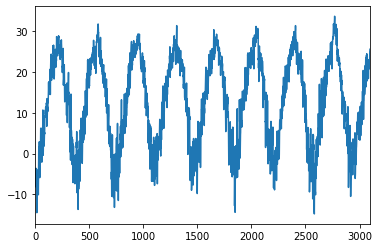

In [461]:
# 8.5년
temp = dat['평균기온(°C)']

temp.plot()
plt.show()

In [517]:
# 8.5년
train_x = temp[:int(365*6.5)]
test_x = temp[int(365*6.5):]

train_x = np.array(train_x)
test_x = np.array(test_x)

In [518]:
len(train_x), len(test_x)

(2372, 726)

In [519]:
ATTR_SIZE = 180 # 윈도우 폭

tmp=[]
train_X = []

for i in range(0, len(train_x) - ATTR_SIZE):
    tmp.append(train_x[i:i+ATTR_SIZE]) ## 윈도우 폭만큼 데이터 저장.

train_X = np.array(tmp)
df = pd.DataFrame(train_X)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,-6.8,-5.4,-4.5,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,...,26.6,24.1,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0
1,-5.4,-4.5,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,...,24.1,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8
2,-4.5,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,...,22.7,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8,25.1
3,-3.9,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,...,22.0,19.7,18.3,19.2,19.2,24.1,21.0,23.8,25.1,24.7
4,-4.0,-7.6,-7.0,-3.6,-7.0,-8.2,-5.4,-8.2,-5.9,-3.8,...,19.7,18.3,19.2,19.2,24.1,21.0,23.8,25.1,24.7,22.6


### 신경망 구성

In [520]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(180, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, 180)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [521]:
model = Net()

### 모형 학습

In [554]:
criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(5000):
    total_loss = 0
    d = []
    
    for i in range(100):
        # 훈련 데이터에 랜덤으로 인덱스 부여
        index = np.random.randint(0, len(train_X))
        
        #미니배치 분할
        d.append(train_X[index])
    d = np.array(d, dtype='float32')
    
    d = torch.from_numpy(d)
    
    # zero grad
    optimizer.zero_grad()
    # forward
    output=model(d)
    
    # loss
    loss = criterion(output, d)
    #backward
    loss.backward()
    
    optimizer.step()
    total_loss += loss.item()
    
    if (epoch+1) % 100 == 0:
        print(epoch+1, total_loss)

100 3.227206230163574
200 3.1954283714294434
300 2.9499971866607666
400 3.030992031097412
500 3.050393581390381
600 3.0580060482025146
700 2.814934253692627
800 2.904121160507202
900 2.9106998443603516
1000 2.7894537448883057
1100 2.7424449920654297
1200 2.5690345764160156
1300 2.6230673789978027
1400 2.4036707878112793
1500 2.499068021774292
1600 2.3216028213500977
1700 2.2403881549835205
1800 2.421143054962158
1900 2.277897596359253
2000 2.3194522857666016
2100 2.357788324356079
2200 2.2761001586914062
2300 2.2344884872436523
2400 2.1151442527770996
2500 2.1890439987182617
2600 1.965499997138977
2700 2.1618828773498535
2800 1.9357500076293945
2900 2.157054901123047
3000 2.052278995513916
3100 2.007622241973877
3200 2.183286428451538
3300 1.938888430595398
3400 2.0074713230133057
3500 2.184049606323242
3600 1.9732990264892578
3700 1.8818529844284058
3800 1.9521355628967285
3900 2.013916254043579
4000 1.8502230644226074
4100 2.5623061656951904
4200 1.8441380262374878
4300 1.83703577518

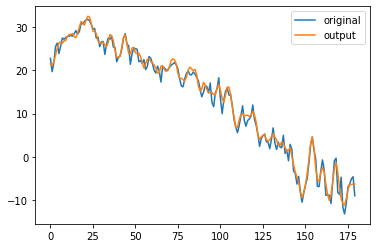

In [555]:
plt.plot(d.data[0].numpy(), label='original')
plt.plot(output.data[0].numpy(), label='output')
plt.legend(loc='upper right')
plt.show()

### 이상 점수 계산 - p.126

In [556]:
tmp = []
test_X = []
last_i = 0

# 테스트 데이터 분할 6개월
print(len(test_x))
for i in range(0, len(test_x), 180):
    if len(test_x) - i < 180:
        # 개수 안맞으면 break
        break
    tmp.append(test_x[i:i+180])
    last_i = i+180

test_X = np.array(tmp, dtype='float32')
pd.DataFrame(test_X)
# tmp.append(test_x[])

726


,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,25.9,25.299999,24.299999,24.700001,26.700001,27.4,27.6,26.4,26.0,26.299999,...,-6.700000,-1.6,-3.900000,-3.900000,-0.9,3.400000,6.100000,2.900000,-2.100000,-3.800000
1,-6.9,-2.100000,2.100000,1.400000,-0.300000,-1.3,-1.8,-4.7,-4.7,-3.000000,...,21.700001,22.5,22.799999,24.799999,22.4,22.700001,23.700001,25.000000,24.500000,25.200001
2,27.1,22.299999,22.299999,23.299999,24.700001,24.4,21.9,22.6,27.4,27.299999,...,-1.900000,-2.2,-4.400000,-2.400000,0.0,1.600000,2.600000,4.000000,3.400000,5.600000
3,6.9,2.400000,-2.300000,0.600000,-1.500000,-10.1,-10.5,-7.6,-6.8,-5.400000,...,18.400000,20.5,21.500000,23.000000,23.0,21.900000,22.000000,21.700001,20.799999,21.400000


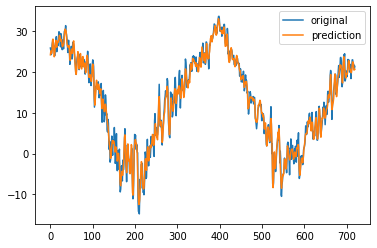

In [557]:

d = torch.from_numpy(test_X)
output = model(d)

# ploting
plt.plot(test_X.flatten(), label='original')
plt.plot(output.data.numpy().flatten(), label='prediction')

plt.legend(loc='upper right')
plt.show()

In [558]:
# 이상 점수 계산
test = test_X.flatten()
pred = output.data.numpy().flatten()

total_score = []

for i in range(0, last_i):
    dist = test[i] - pred[i]
    # x to the power y,
    score = pow(dist, 2) # dist **2 
    total_score.append(score)
    
# 이상 점수 정규화 [0, 1]
total_score = np.array(total_score)
max_score = np.max(total_score)
total_score = total_score / max_score

total_score

array([1.37533740e-01, 7.90834291e-04, 3.72025949e-03, 3.84700738e-04,
       8.51780243e-02, 8.56493552e-03, 1.20663867e-02, 7.57860402e-03,
       2.05303744e-02, 3.23965341e-01, 1.02484334e-03, 1.56687585e-03,
       1.91108506e-04, 2.24977278e-03, 2.79531034e-01, 6.01668543e-02,
       2.34567957e-02, 1.46963694e-02, 6.03530315e-02, 4.11640068e-02,
       1.72919530e-01, 3.55536044e-02, 3.40876263e-03, 1.03330675e-01,
       1.60036304e-01, 1.72615624e-01, 3.19188043e-02, 8.22245836e-04,
       2.74144083e-02, 4.24552986e-02, 1.02576289e-01, 5.29907096e-02,
       9.23384908e-02, 5.45109511e-02, 1.29529558e-03, 3.11925371e-03,
       7.17622834e-02, 4.40913592e-03, 7.55088418e-03, 5.38765362e-02,
       5.72723984e-02, 9.63545412e-02, 4.17771090e-02, 1.11679162e-01,
       2.49461032e-03, 2.20933449e-03, 1.24894078e-01, 9.61785272e-03,
       2.77393195e-02, 5.85225477e-02, 1.00008415e-02, 1.76901812e-01,
       7.26966932e-02, 2.08577704e-01, 1.61829337e-03, 6.64302656e-02,
      

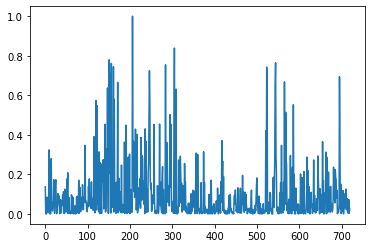

In [559]:
# 임계값을 정해둬야 함.
plt.plot(total_score)
plt.show()